# SMU Master of Science (Economics) Programming Workshop in Python


## Introduction
In today's class, we will be learning more about plotting with Python. The key libraries used in this course are [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/).

---

### Plotting

There are many different kinds of plots: line plots, histograms, 3D plots, violin plots, bar charts, pie charts, scatterplots and heatmaps. Knowing how to use plots effectively helps in explaining certain phenomena to your audience. Consider the following questions you are trying to answer:

Suppose we are trying to find out the relationship between how much a pair of jeans cost, and how long they last, and we have some data. What is the most effective way to plot them? One might suggest the use of a scatterplot, as it is the best way to plot the relationship between 2 numeric variables.

What if one is interested in how GDP growth changes over time? What is the most effective way to plot that then? One might argue that the simple line plot works best for viewing temporal relationships. 

Finally, suppose you're working in a bank, and are thinking whether certain types of securities, such as equities and REITs, yield a higher return than other types, such as bonds. One way to do so will be to use a lineplot, or a bar chart to illustrate this.

In this section, we'll have a somewhat informal discussion about plots, and attempt to answer these questions: 

    1. Why do we need plots?
    2. How do we use them effectively?
    3. How do we do it in Python?

Once again, we will be learning plotting using an application-based approach. There are 2 examples which we will be exploring in much detail, examples which you should be familiar with by now: the Titanic dataset from Kaggle and the MovieLens dataset from GroupLens.

---

### Data Plotting with Titanic
Of course, we begin the course by importing the key libraries and datasets into Jupyter. This can be achieved using the functions, `import` and `pd.read_csv`.

In [1]:
# pandas and numpy are used for data manipulation, cleaning and processing
import pandas as pd
import numpy as np

# Seaborn and matplotlib are used for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# style allows us to change the format that matplotlib uses to plot
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
dat = pd.read_csv('data/titanic/train.csv')

To begin, we can start by taking a closer look at the dataset.

In [3]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dat.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mallet, Mr. Albert",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Histograms: Plotting Numerical (non-continuous) Features

Note that there are many variables in the dataset, allowing for many different hypotheses to be tested by means of plotting. Let's begin with the Survived variable. What percentage of the passengers on the Titanic survived? We can use a histogram to show that.

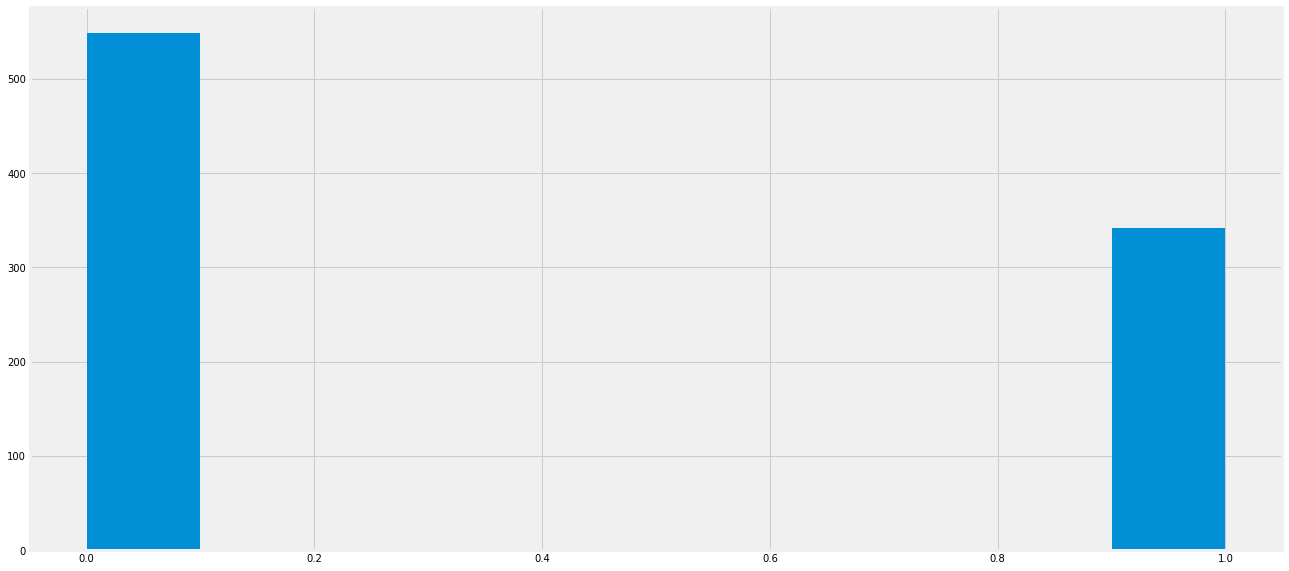

In [6]:
plt.figure(figsize=(20, 10))
plt.hist(dat['Survived'])
plt.show()

That was a poor use of a plot, since we could always use the method, `mean` to find out the mean survival rate. In addition, there aren't any interesting hypotheses to test based on this observation alone. That said, this is one way of showing your audience what you are trying to say.

#### Functions:

Without further ado, let's take a closer look at the previous code chunk, and dissect whatever's happening:

`plt.figure(figsize=(20, 10))` alters the figure size to fill the whole screen. The first coordinate represents how wide the image is, and the second coordinate represents how tall you want the image to be.

`plt.hist()` takes a series as an argument and returns the histogram. In our case, since "Survived" only has 2 values (0 and 1), it returns a histogram with 2 unique bins.

`plt.show()` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

---

Let's take a closer look at the `plt.hist()` function. Recall that we can use the '?' feature in Jupyter.

In [5]:
?plt.hist()

#### Countplots: Histograms for Categorical Variables

Apart from a histogram, there are many other ways one can use to plot relationships. We can use a countplot to plot the count the number of observations for categorical variables, such as the 'Embarked' and 'Pclass' variable.

In addition, we use the function, `plt.subplot` to tell Python and MatPlotLib that we want to have more than just 1 plot. Note the first 2 arguments of `plt.subplot` refers to the "height" and "width" of the plots - we wish to have 2 plots plotted side by side.

What happens if we changed the argument to `plt.subplot(2, 1, 1)` instead?

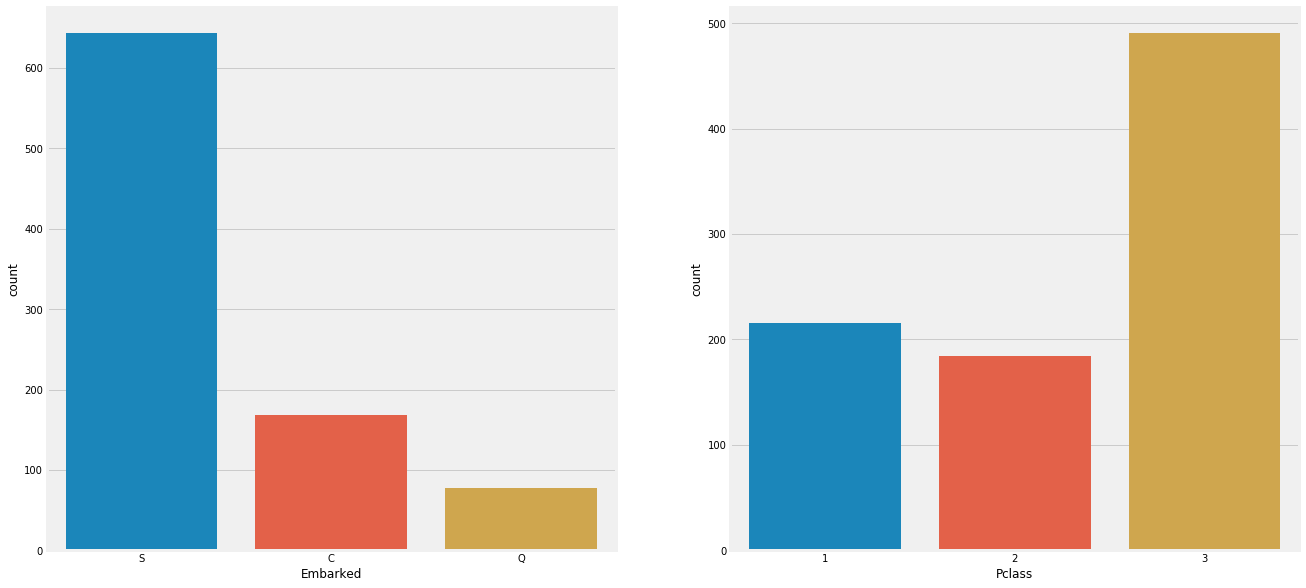

In [6]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.countplot(dat['Embarked'])

plt.subplot(1, 2, 2)
sns.countplot(dat['Pclass'])
plt.show()

#### Scatterplots: Plotting relationship between 2 numerical variables
Sometimes, we are interested in the relationship between 2 numerical features, for example Age and Fare, To do so, we can use the scatter plot to plot this relationship. 

In addition, we can use the `plt.xlabel` and `plt.ylabel` functions to label the x and y-axes. Also, we can use the `plt.title` function to label the title of the plot.

In [9]:
?plt.scatter

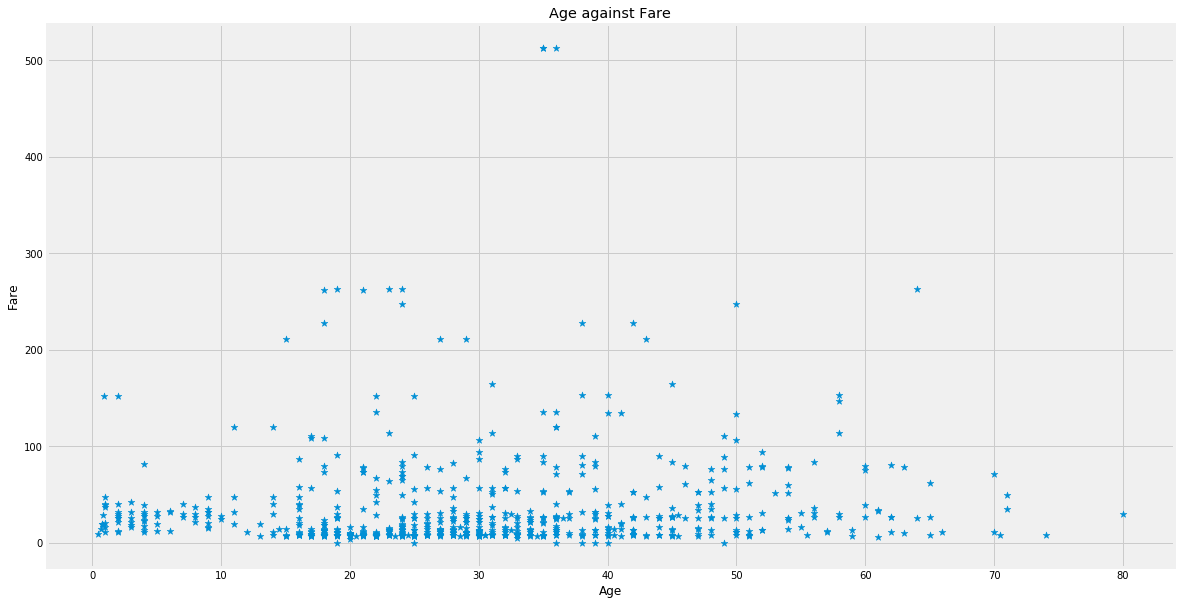

In [10]:
plt.figure(figsize=(18, 10))
plt.scatter(dat['Age'], dat['Fare'], s=50, marker='*')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age against Fare')
plt.show()

Is there a relationship between Age and Fare? We can't really tell with this graph. However, it turns out that we can change the code to add a best fit line into the scatter plot, using seaborn's regression plot:

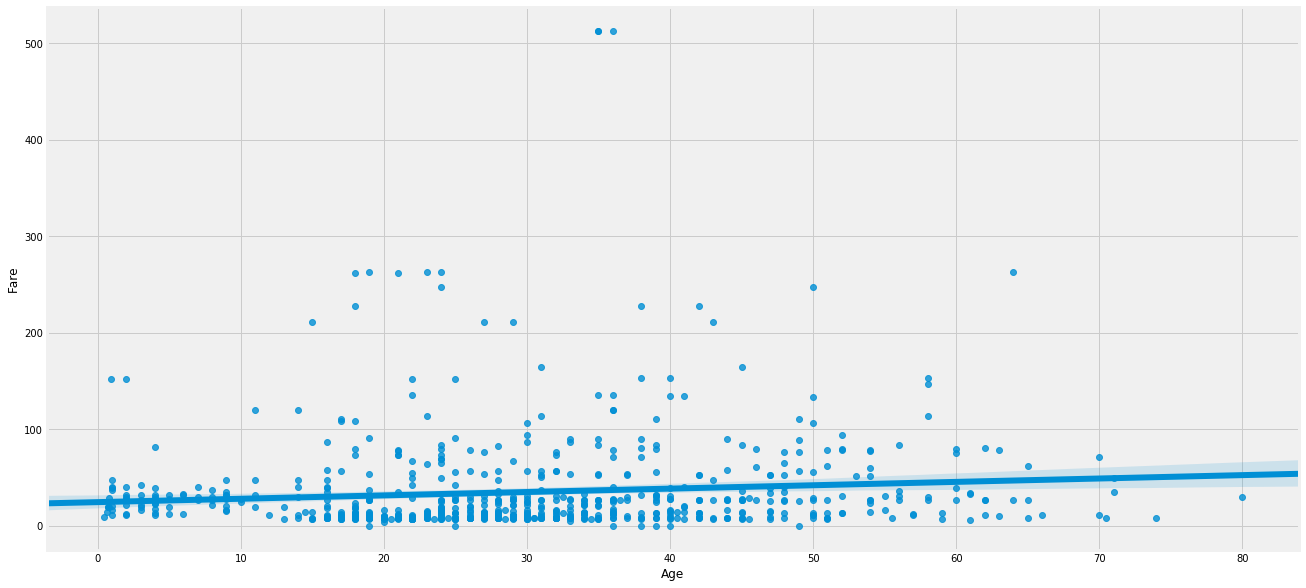

In [11]:
plt.figure(figsize=(20, 10))
sns.regplot(x='Age', y='Fare', data=dat)
plt.show()

There is a really weak relationship between the two variables. Interestingly, the regression plot yields the 95% confidence interval for that regression.

### Arguments for Plots

This section is dedicated to the various arguments we could include when plotting:

1. `plt.figure` creates a new figure, and accepts arguments such as figure size, resolution of the figure etc.
2. `plt.xlabel` creates the label for the x-axis
3. `plt.ylabel` creates the label for the y-axis
4. `plt.title` creates the title for the plot
5. `plt.xlim` sets the "x" limits of the current axes
6. `plt.ylim` sets the "y" limits of the current axes
7. `plt.legend` creates a box of the legend (to be used in conjunction with "label" in plots)

We will use the following examples to illustrate how you can use some of these arguments to "beautify" your plots.

#### Distribution Plots: Histogram Plots for Continuous Variables
Suppose we are interested in the relationship between a categorical variable and a numerical variable, say Age and Survival. 

We want to explore how Age affects Survival rate: how can we do so? One way to do so is to plot 2 distribution functions; 1 for those who survived and 1 for those who did not. We can use the kernel density plot from seaborn to do so:

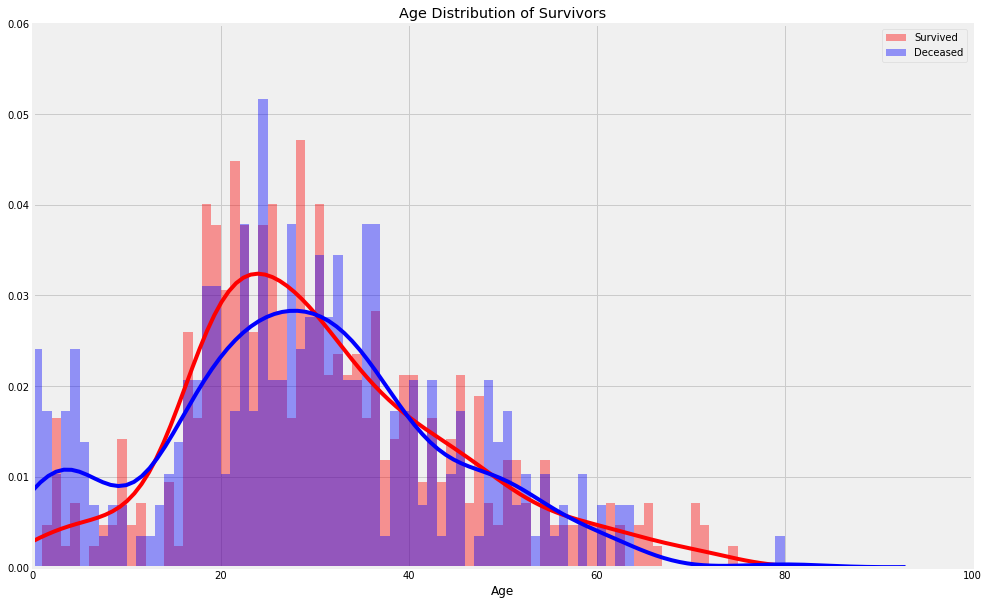

In [15]:
plt.figure(figsize=(15, 10))
sns.distplot(dat[dat.Survived == 0].Age.dropna(), bins=range(0, 81, 1), color = 'red', label="Survived")
sns.distplot(dat[dat.Survived == 1].Age.dropna(), bins=range(0, 81, 1), color = 'blue', label="Deceased")

# Sets "x" limits, "y" limits and title of the plot
plt.ylim([0, 0.06])
plt.xlim([0, 100])
plt.legend(loc='upper right')
plt.title('Age Distribution of Survivors')
plt.show()

One of the observations made here, is that children under the age of 10 are typically more likely to survive than perish. For all other age groups, the trend is reversed; people are more likely to perish than survive.

#### Pairsplot: Exploring Multiple Numerical Features

Given that there are **so many** relationships to explore, how can we fully explore them in detail? One way to do so is to plot the relationships between *any* 2 features in our dataset, and it turns out that there is a very convenient way of doing so. We can use a pairplot.

We can use the function, `sns.pairplot` to plot the relationship between 2 features in a particular dataset. Note that `sns` stands for seaborn.

/Users/ngbolin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ngbolin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


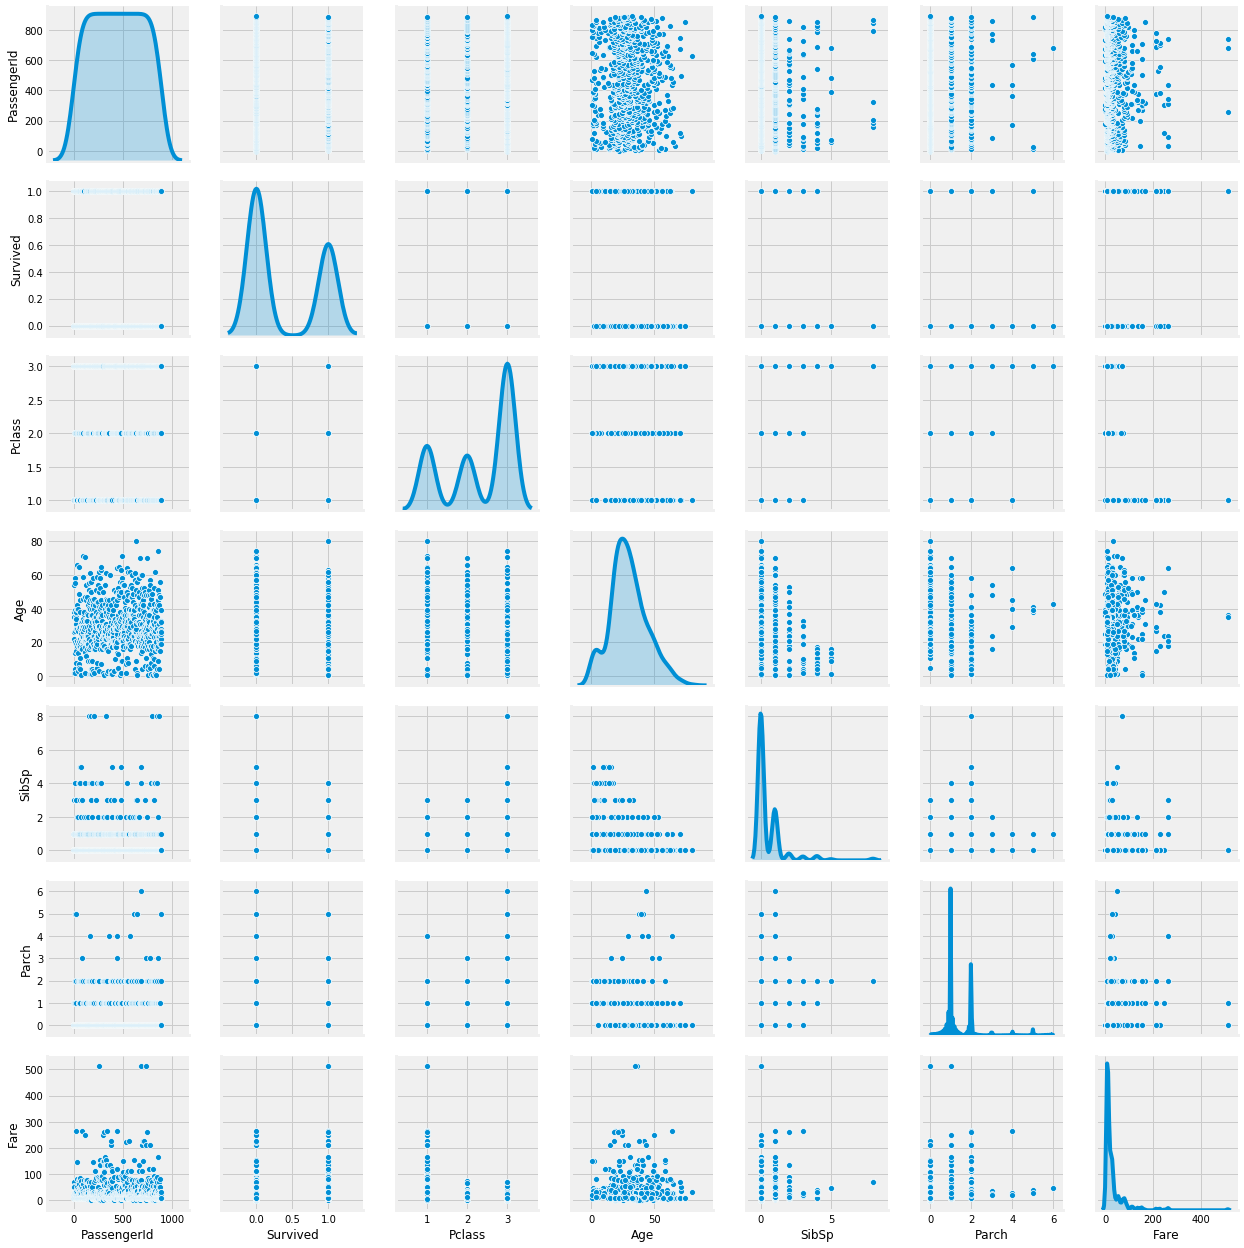

In [13]:
sns.pairplot(dat, diag_kind='kde')
plt.show()

Note that we set the argument, `diag_kind` to "kde" and [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation) stands for Kernel Density Estimation - a non-parametric way to estimate the probability density function of a random variable. This means that we want the diagonal plots to be the probability density functions of the variables themselves.

---

#### Correlation Plots & Heatmaps: Exploring Correlation Across Multiple Numerical Features

While some of the relationships provided aren't very informative, it gives us a good idea of what we should be looking out for. In addition, we can further explore the underlying relationships in the dataset with a correlation plot (in the form of a heatmap to get a better idea).

In [14]:
dat.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In the following code, we use the "Blues" color map, and set `annot` to True. This means that we want the correlation figures to show on the heatmap itself.

One downside of the heatmap is that it doesn't really show the relationship between "string" categorical variables, against numerical variables.

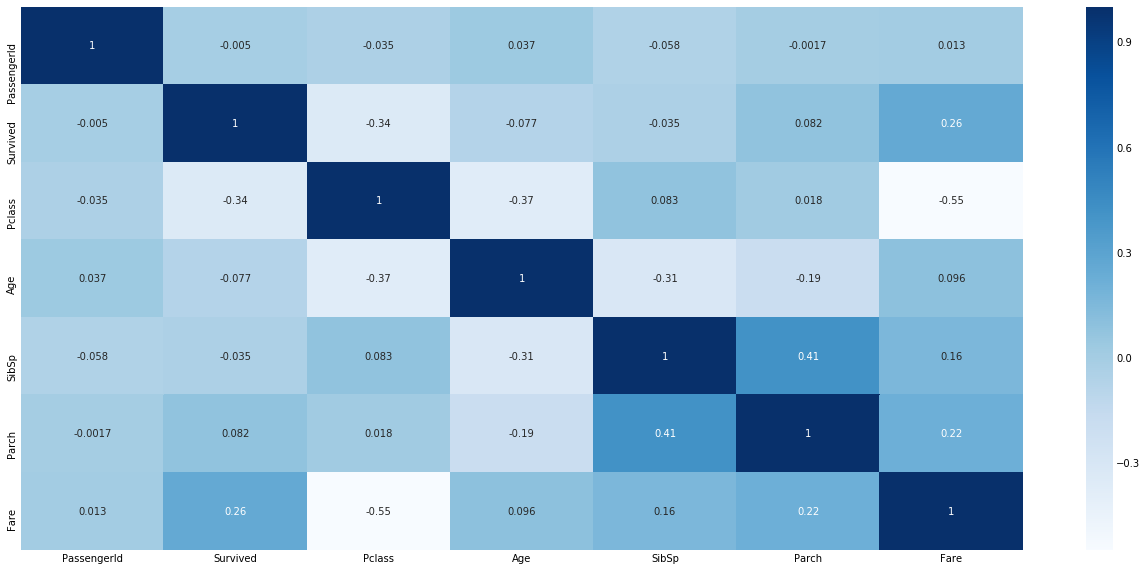

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(dat.corr(), cmap='Blues', annot=True)
plt.show()

From the heatmap above, we note that Fare and Passenger Class are good indicators of predicting who survives. Also, we note that PassengerID is not very indicative of whether or not a passenger survived, but we should have expected that to begin with.

In-class assignment
___

1. Plot the relationship between Age and Survival Rate. It is useful to check out [seaborn's barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)
2. Plot the survival distributions (1 for those who survived and 1 for those who did not) against Fare to test the hypothesis that richer people are more likely to survive

In [16]:
## Your code here

In [17]:
## Your code here

#### Violin Plots: Conditional Relationship between Categorical and Numerical Variable

There are many other plots for different purposes, and we will be exploring some of them here. One might be interested in plotting the relationship between where a passenger Embarked, how much he or she paid and how likely he or she is to survive. In this case, we can use the violin plot. 

The violin plot function, `sns.violinplot` takes 4 arguments, 2 for the x and y-axes, and 1 for the "hue" argument and 1 for the "split" argument.

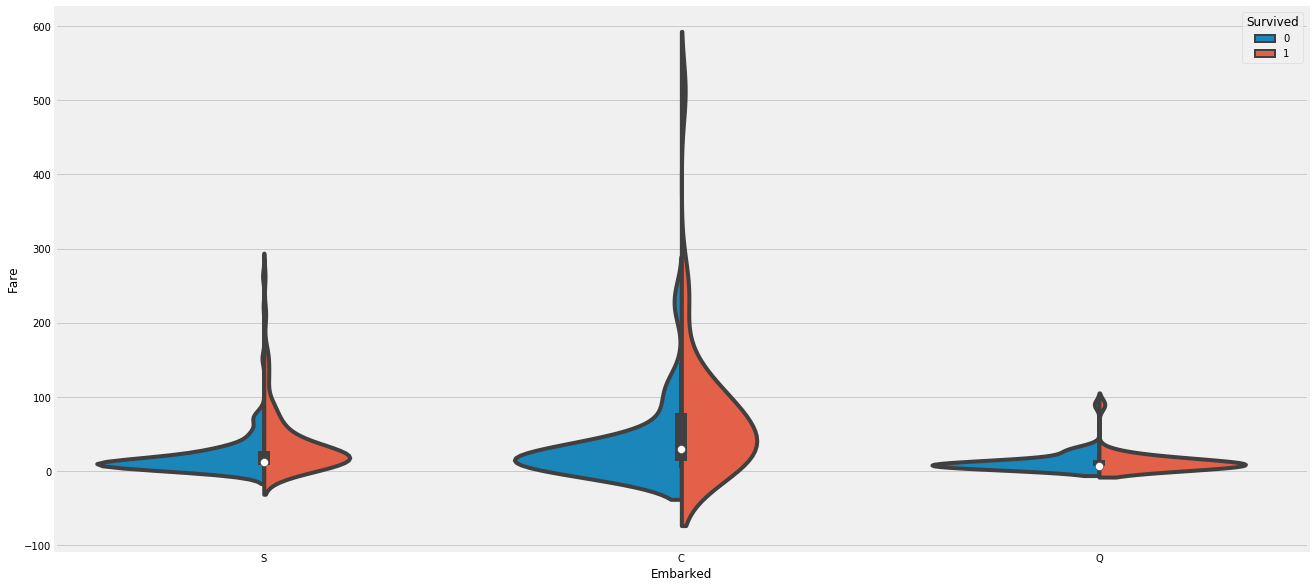

In [18]:
plt.figure(figsize=(20, 10))
sns.violinplot('Embarked', 'Fare', hue = 'Survived', data = dat, split = True)
plt.show()

#### Factor Plots: Relationship between Categorical and Numerical Features

Consider the following hypothesis, where we are trying to plot the relationship between how many Siblings/Spouse (SibSp) one has as well as how many Parents and Children (Parch) one has, and the likelihood of survival. One way of plotting this is to use the factorplot.

/Users/ngbolin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


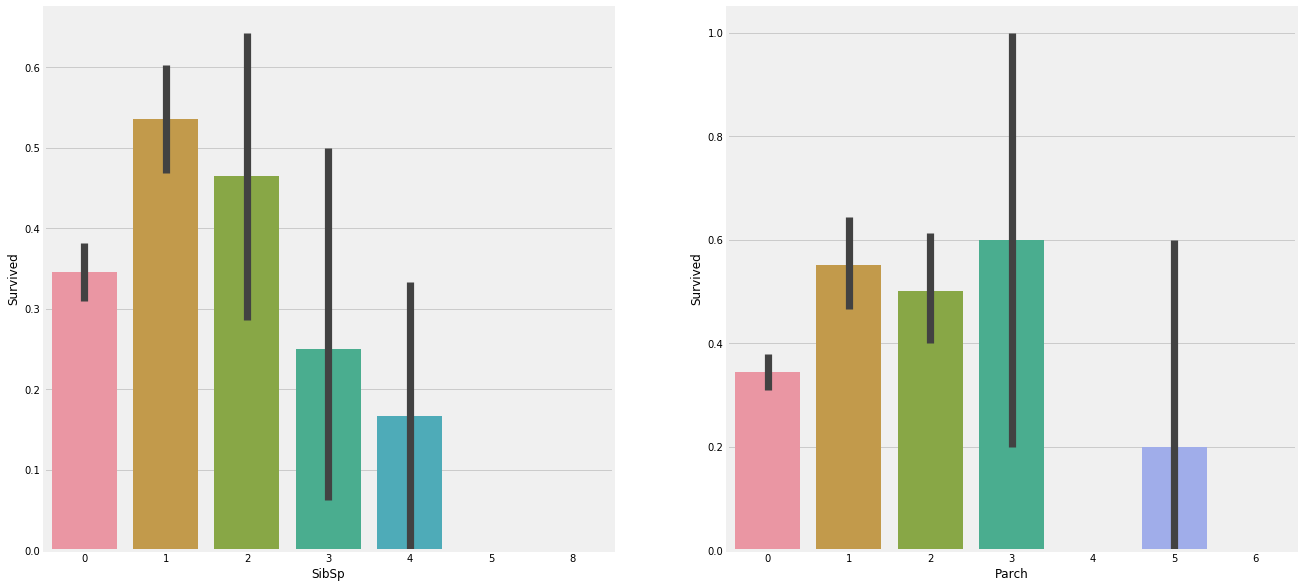

In [19]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

g1 = sns.factorplot('SibSp', 'Survived', kind='bar', data=dat, ax=ax1)
plt.close(g1.fig)

g2 = sns.factorplot('Parch', 'Survived', kind='bar', data=dat, ax=ax2)
plt.close(g2.fig)

plt.show()

Now that you have a working understanding of plotting in Python, it's time to put that to the test with an in-class assignment:


A data scientist walks up to you, and proposes the following hypothesis:

"I think the ticket type is likely to be correlated with the survival rate. To obtain the ticket type, use the first character of the 'Ticket' column. For example, if the Ticket Number is 'AC 2015', the ticket type is 'A', while if the Ticket number is '152385', then the ticket type is '1'." 

Prove or disprove this hypothesis, by means of an appropriate plot. You are required to do some data cleaning, to impute missing values and create a new column, 'TicketType'.

In [20]:
# Step 1: Impute missing values with 'N'


# Step 2: Get Ticket Type, by obtaining first character of Ticket Number


# Step 3: Plot Ticket Type against Survival Rate

### Data Plotting with MovieLens

Let's use whatever we currently know to explore some relationships across features in the MovieLens dataset. 

In [17]:
# Import user data table
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('data/movielens/ml-1m/users.dat', engine='python', sep='::', header=None, names=unames)

# Import ratings table
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('data/movielens/ml-1m/ratings.dat', engine='python', sep='::', header=None, names=rnames)

# Import mnames table
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('data/movielens/ml-1m/movies.dat', engine='python', sep='::', header=None, names=mnames)

In [18]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [19]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [20]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Similar to the last's lesson, we will combine the 3 dataframes together. One neat way to do this is the following:

In [21]:
dat = pd.merge(pd.merge(ratings, users), movies)

In [22]:
dat.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


Notice that in the previous lesson, we provided an additional argument, `on`, but in this lesson, we don't have to? What changed? As it turns out, pandas automatically merges the 2 dataframes on the index column if you do not provide the `on` argument.

---


Suppose we are interested in the distribution of the average reviews in the dataset. We can use seaborn's `sns.distplot` function. Including the argument, `vertical` rotates the plots so that the y-axis becomes the x-axis, and the x-axis becomes the y-axis.

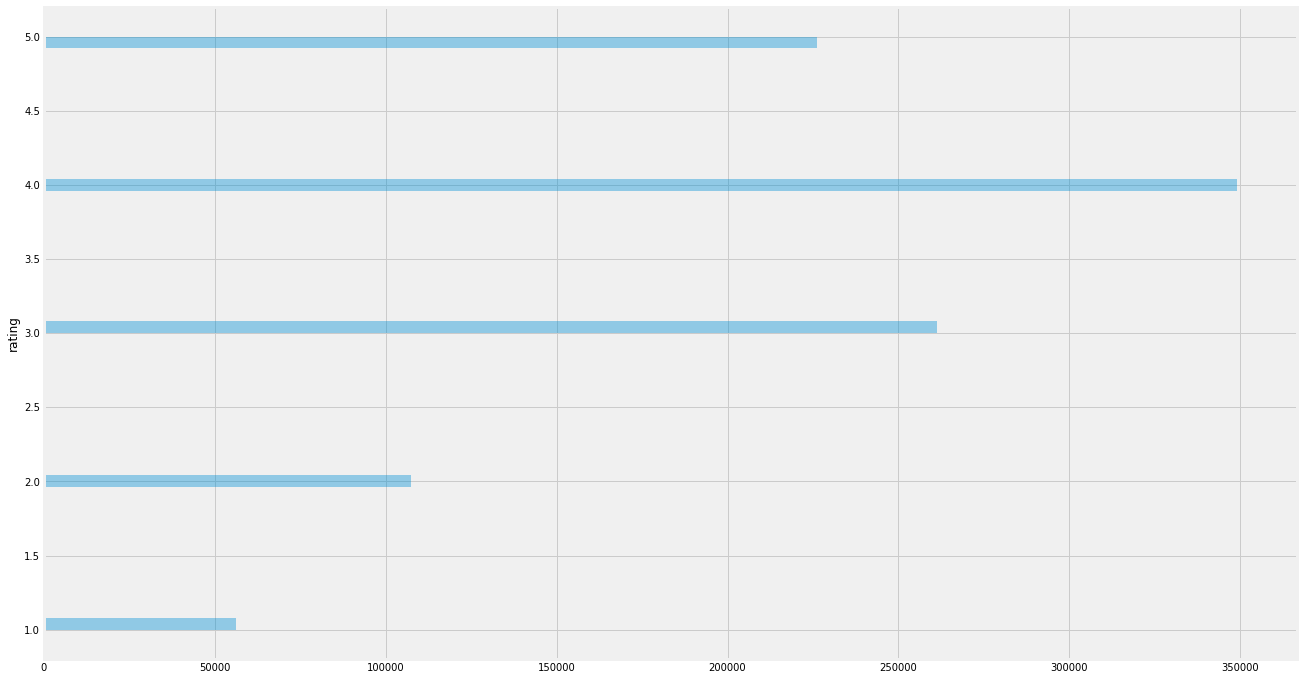

In [23]:
plt.figure(figsize=(20, 12))
sns.distplot(dat['rating'], kde=False, vertical=True)

As it turns out, most of the ratings given by the users are 4-stars ratings. Which movies have the most reviews? Let's find out by means of the plot. Recall that we can use the pd.DataFrame method, `groupby` in conjuction with the method `size` to get the total number of ratings per movie.

In this case, however, we can simply use seaborn's inbuilt `countplot` function. The countplot functions counts the number of occurrence in the dataframe, and plots it. However, there appears to be too many unique films in the dataset. We can include an additional argument, `order` to "restrict" the number of films that we are interested in.

In [26]:
dat.title.value_counts()[:10]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: title, dtype: int64

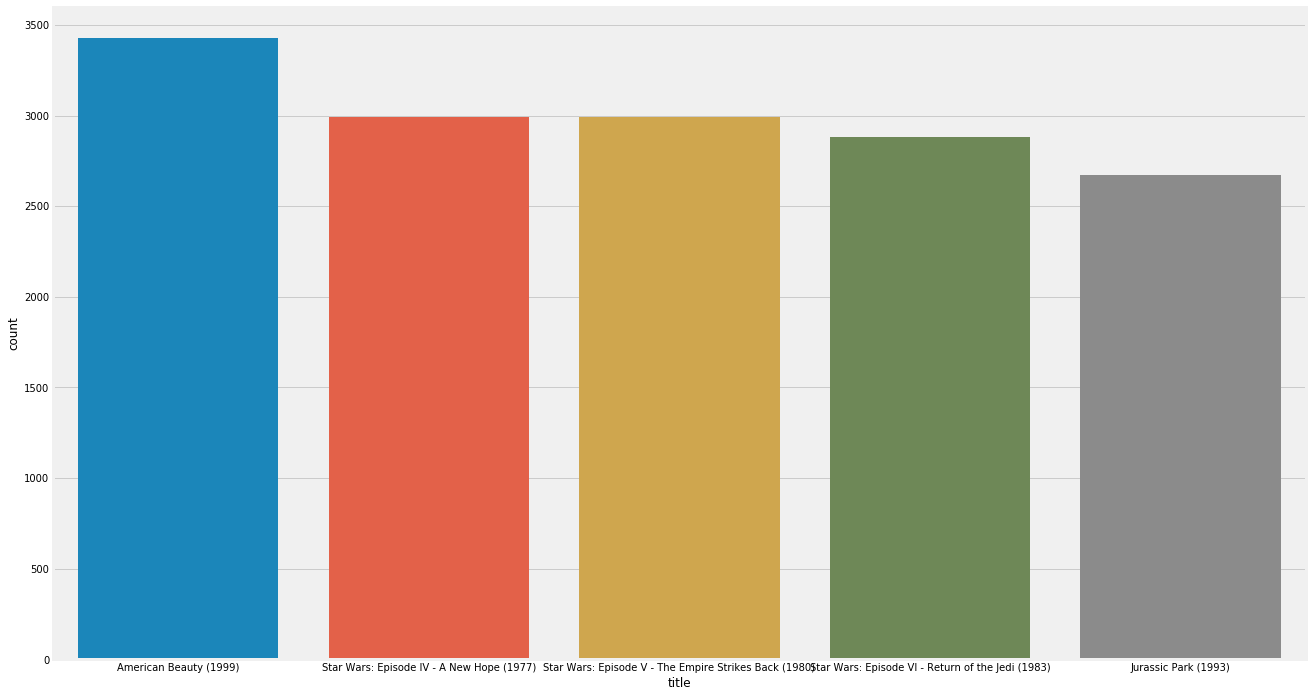

In [28]:
plt.figure(figsize=(20, 12))
sns.countplot(x='title', data=dat, 
              order=dat.title.value_counts().iloc[:5].index) # value_counts() returns by order the highest counts

In the graph above, we restricted the number of films to be 5, and selected the top 5 films.

---

In-class assignment:

1. Using the same type of plot, plot the 5 least popular films.
2. Plot the top 10 genres using the countplot

In [29]:
## Your code here

In [30]:
## Your code here

Note that there are some films with multiple genres. 

#### Application - Data Manipulation with Plotting
We can split the each observation on '|', and collect the genres in the form of a list. In what follows, we do so using functional programming.

In [31]:
dat.genres.apply(lambda x: x.split('|')).head()

0    [Drama]
1    [Drama]
2    [Drama]
3    [Drama]
4    [Drama]
Name: genres, dtype: object

We then use a for-loop to loop over all observations/entries, and another for-loop to loop over the genres, and use a dictionary to store the counts for each genre.

The complexity associated with the following chunk of code is NM, where N represents the number of observations, and M represents the most number of genre each film could have. As it turns out, N = 1,000,000, and M = 5 => MN = 5,000,000. Python takes about 1 second to compute this operation.

In [32]:
genre_counts = {}
for genres in dat.genres.apply(lambda x: x.split('|')):
    for genre in genres:
        try: genre_counts[genre] += 1
        except: genre_counts[genre] = 1

In [33]:
genre_counts

{'Action': 257457,
 'Adventure': 133953,
 'Animation': 43293,
 "Children's": 72186,
 'Comedy': 356580,
 'Crime': 79541,
 'Documentary': 7910,
 'Drama': 354529,
 'Fantasy': 36301,
 'Film-Noir': 18261,
 'Horror': 76386,
 'Musical': 41533,
 'Mystery': 40178,
 'Romance': 147523,
 'Sci-Fi': 157294,
 'Thriller': 189680,
 'War': 68527,
 'Western': 20683}

We can then sort by the values in the `genre_counts` dictionary to get the top 10 genres.

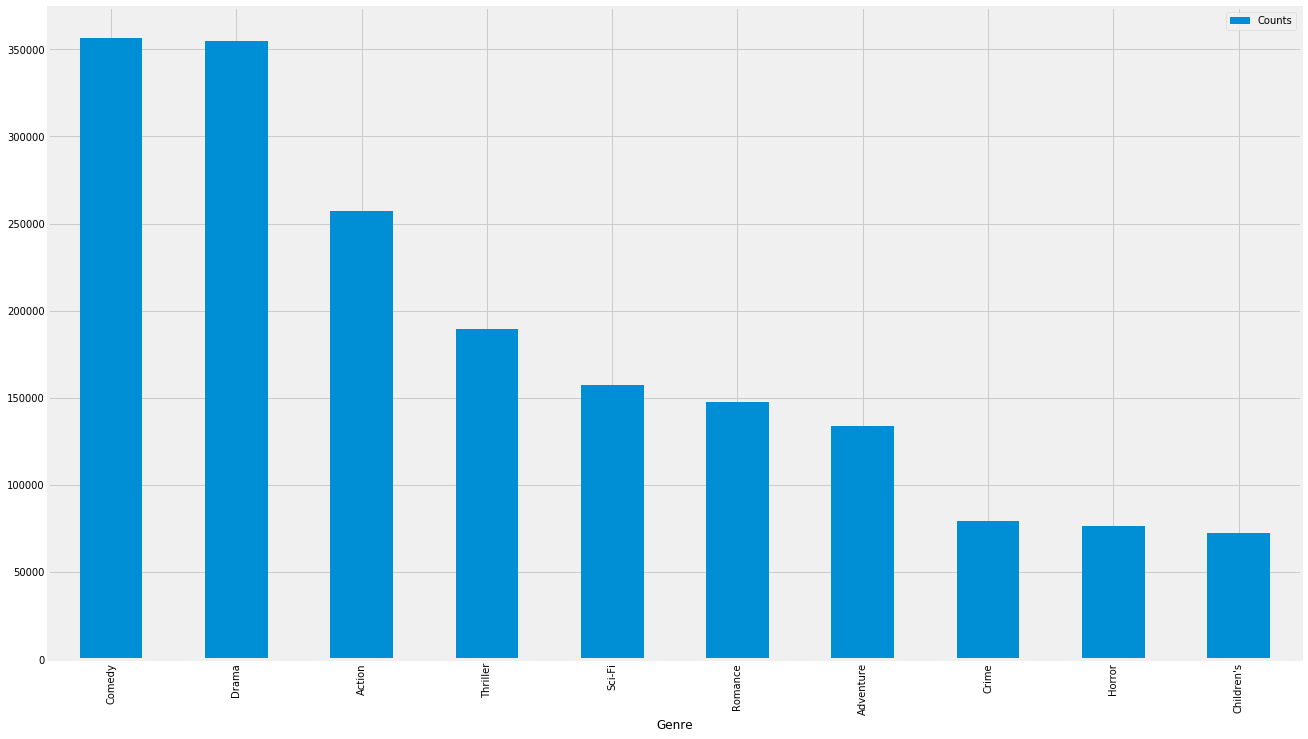

In [59]:
import operator

sorted_genre_counts = sorted(genre_counts.items(), key=operator.itemgetter(1), reverse=True)
sorted_genre_df = pd.DataFrame(sorted_genre_counts[:10], columns=['Genre', 'Counts'])
sorted_genre_df.set_index('Genre', inplace=True)

sorted_genre_df.plot.bar(figsize=(20, 12))

### Preliminary Regular Expressions

In this lesson, we will also be dealing with a not-so-gentle introduction to regular expressions (a gentler introduction will be done next lesson). This is just to give you a flavour as to why regex can do, to motivate our learning of regex.

We motivate the use of regular expressions through the following example. Suppose we are interested in the number of films which are produced and shown for each year.

In [61]:
dat.title.head()

0    One Flew Over the Cuckoo's Nest (1975)
1    One Flew Over the Cuckoo's Nest (1975)
2    One Flew Over the Cuckoo's Nest (1975)
3    One Flew Over the Cuckoo's Nest (1975)
4    One Flew Over the Cuckoo's Nest (1975)
Name: title, dtype: object

Noting that the year is given in parentheses (round brackets), we can make use of this specific pattern to obtain the year of production. 

Typically, to conduct preliminary text analysis, we import the following libraries:

1. The regular expressions library, `re`
2. The string library, `string`

Regular expressions a sequence of symbols and characters expressing a string or pattern to be searched for within a longer piece of text. In our case, we are interested in searching for the pattern "(YYYY)" from the Title column.
To do so, we can write a function that does that, and apply it to the column. 

We will be using the function, `re.findall`, which takes 2 arguments, the pattern to search for and the string.

In [77]:
import re
import string

def year_from_title(text):
    pattern = '\(([0-9]+)\)'
    return re.findall(pattern, text)[0]

dat.title.apply(lambda x: int(year_from_title(x))).head()

0    1975
1    1975
2    1975
3    1975
4    1975
Name: title, dtype: int64

In [78]:
dat['Year'] = dat.title.apply(lambda x: int(year_from_title(x)))

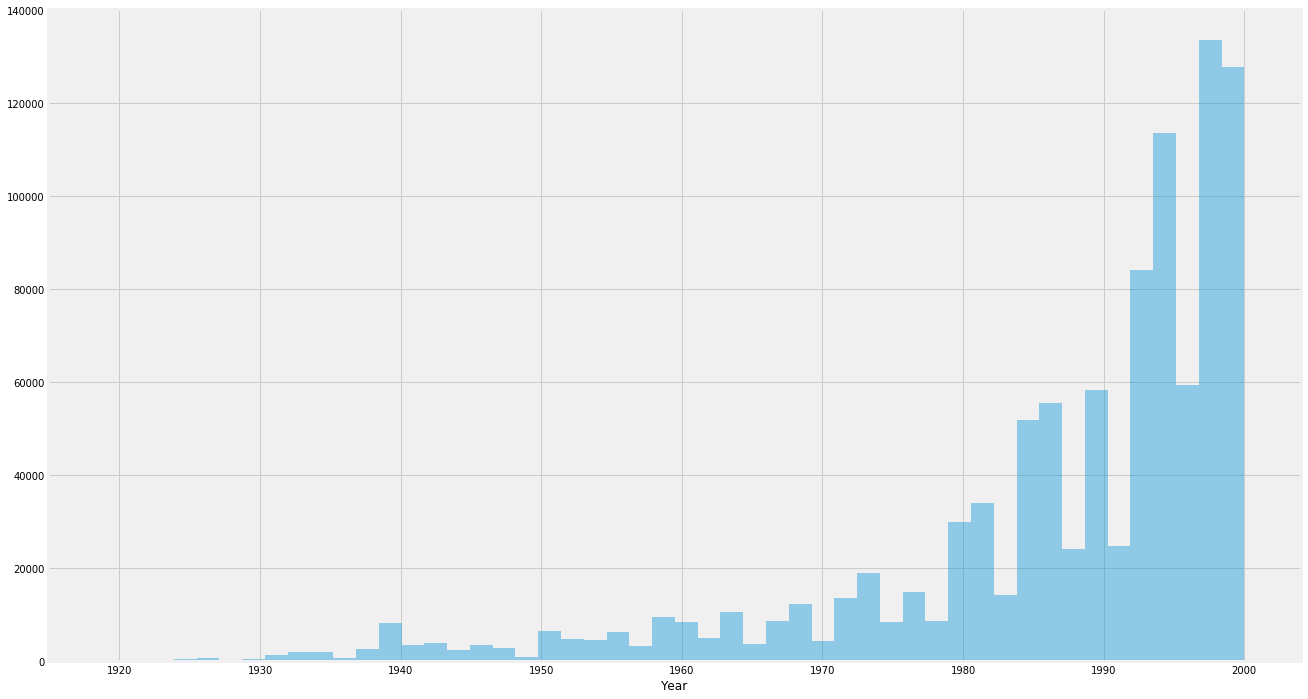

In [84]:
plt.figure(figsize=(20, 12))
sns.distplot(dat.Year, kde=False)
plt.show()